# **Data Science Project**
## !--IMPORTANT DETAILS --!
- **Dataset** ---> Thyroid Cancer Risk Data
- **Language Used** --> Python
- **Libraries Used** --> Numpy, Pandas, Sckit-Learn, missingno
## **TASKS**
1. Data Preprocessing & Feature Engineering (Hussnain Ali)
2. EDA & Visualization (Pramay)
3. Model Training (Jagdish and Saif)
4. Model Evaluation (Hussnain Ali and Arslan)
5. Documentation (Shyam Sundar)
6. Project Management & Tasks Administration (Hussnain Ali)

## 1. Initializing Setup ------------> Perfomed By Hussnain Ali

### a. Importing Libraries

In [215]:
import warnings
from collections import Counter
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### b. Initial Configurations

In [216]:
pd.set_option("display.float_format", "{:.3f}".format)
pd.set_option("display.max_rows", 100)
pd.set_option("display.precision", 3)
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

### c. Loading Dataset and Reading Basic Information

In [217]:
# Load the dataset
df=pd.read_csv("./data/healthcare-dataset-stroke-data.csv")
df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,51676,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,NaN,never smoked,1
2,31112,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,60182,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,1665,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


In [218]:
# Display the shape of the dataset
df.shape

(5110, 12)

In [219]:
print("Columns Information:")
df.info()

Columns Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [220]:
print("Basic Stats:")
df.describe().T

Basic Stats:


,count,mean,std,min,25%,50%,75%,max
id,5110.000,36517.829,21161.722,67.000,17741.250,36932.000,54682.000,72940.000
age,5110.000,43.227,22.613,0.080,25.000,45.000,61.000,82.000
hypertension,5110.000,0.097,0.297,0.000,0.000,0.000,0.000,1.000
heart_disease,5110.000,0.054,0.226,0.000,0.000,0.000,0.000,1.000
avg_glucose_level,5110.000,106.148,45.284,55.120,77.245,91.885,114.090,271.740
bmi,4909.000,28.893,7.854,10.300,23.500,28.100,33.100,97.600
stroke,5110.000,0.049,0.215,0.000,0.000,0.000,0.000,1.000


## 3. Exploratory Data Analysis (EDA)  -----------> Performed By Pramay

### a. PRAMAY WORK.....

## 4. Data Preprocessing ----------> PERFORMED BY HUSSNAIN ALI

### a. Deal with Missing Values

In [221]:
# Display the number of missing values in each column
missing_values_count=df.isnull().sum()
total_cells=np.prod(df.shape)
total_missing_values=missing_values_count.sum()
percentage_missing = (total_missing_values / total_cells) * 100
percentage_missing_per_column = (missing_values_count / df.shape[0]) * 100

print("Missing Values:")
print(missing_values_count)

print(f"\nTotal Missing Values: {total_missing_values}")
print(f"Percentage of Missing Data: {percentage_missing:.3f} %")
print("\nPercentage of Missing Values Per Column:")
print(percentage_missing_per_column)

Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Total Missing Values: 201
Percentage of Missing Data: 0.328 %

Percentage of Missing Values Per Column:
id                  0.000
gender              0.000
age                 0.000
hypertension        0.000
heart_disease       0.000
ever_married        0.000
work_type           0.000
Residence_type      0.000
avg_glucose_level   0.000
bmi                 3.933
smoking_status      0.000
stroke              0.000
dtype: float64


<Axes: >

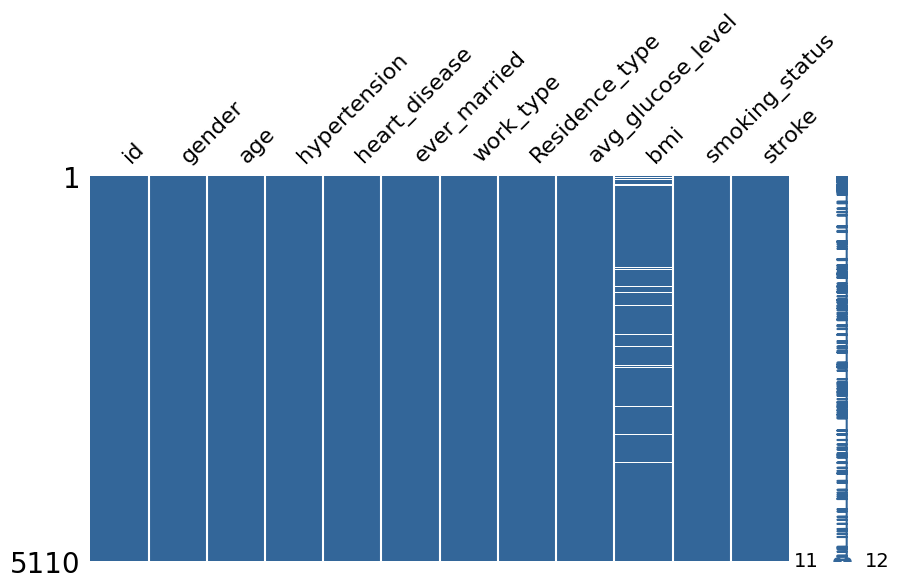

In [222]:
msno.matrix(df,figsize=(10,5),color=(0.2,0.4,0.6))

<Axes: >

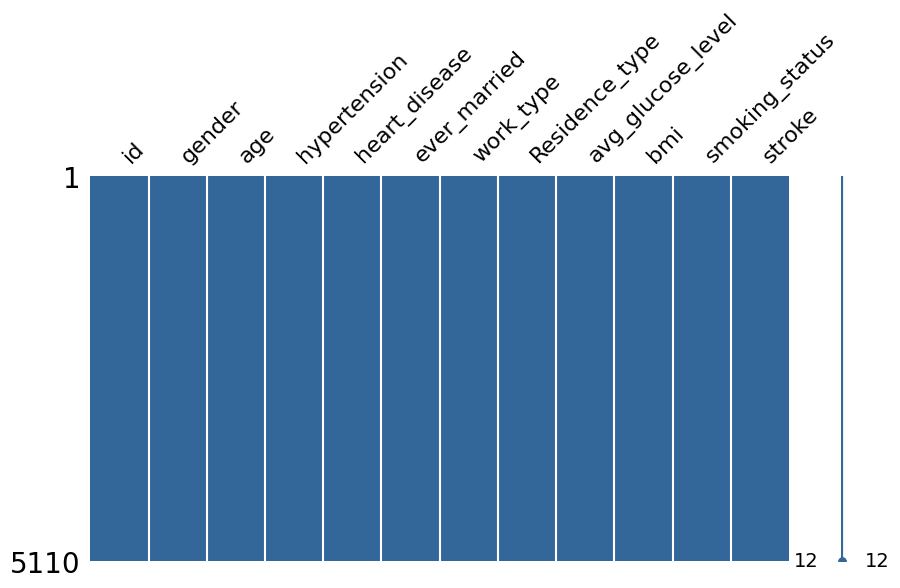

In [223]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())
msno.matrix(df,figsize=(10,5),color=(0.2,0.4,0.6))


### c. Droping Unnecessary Columns
#### In this part of the code, as our aim is to train the machine learning model to predict thyroid cancer type so **Country**, **Patient_ID** and **Ethnicity** are not required as important features for training model

In [224]:
# df=df.drop(columns=['Country','Patient_ID','Ethnicity'],axis=1,errors='ignore')
# df.head()

df=df.drop(columns=['id'],errors='ignore')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.000,0,1,Yes,Private,Urban,228.690,36.600,formerly smoked,1
1,Female,61.000,0,0,Yes,Self-employed,Rural,202.210,28.893,never smoked,1
2,Male,80.000,0,1,Yes,Private,Rural,105.920,32.500,never smoked,1
3,Female,49.000,0,0,Yes,Private,Urban,171.230,34.400,smokes,1
4,Female,79.000,1,0,Yes,Self-employed,Rural,174.120,24.000,never smoked,1


### d. Remove Duplicate Data

In [225]:
print("Total fully duplicated rows:", df.duplicated().sum())
duplicate_features = df.drop(columns=["stroke"]).duplicated().sum()
print(f"Rows with duplicate features but possibly different outcomes: {duplicate_features}")


Total fully duplicated rows: 0
Rows with duplicate features but possibly different outcomes: 0


### e. Convert Data Types

In [226]:
df['age']=df['age'].astype(int)

 ## 5. Feature Engineering ----> PERFORMED BY HUSSNAIN ALI

### a. Encoding Categorical Variables

In [227]:
mdf=df.copy(deep=True)

categorical_features = []
discrete_features = []
binary_features=[]
non_binary_features=[]
for i in mdf.columns:
    if df[i].nunique() > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)
        if df[i].nunique()==2:
            binary_features.append(i)
        else:
            non_binary_features.append(i)
        

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)
print('Binary Categorical Features:',*binary_features)
print('Non_Binary Categorical Features',*non_binary_features)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi
Binary Categorical Features: hypertension heart_disease ever_married Residence_type stroke
Non_Binary Categorical Features gender work_type smoking_status


In [228]:
le=LabelEncoder()
binary_features=[col for col in binary_features if col not in ['hypertension', 'heart_disease']]
print("Encoding Binary Features:")
for col in binary_features:
    mdf[col]=le.fit_transform(mdf[col])
    print(f"{col} : {mdf[col].unique()} = {le.inverse_transform(mdf[col].unique())} ")

mdf['gender'] = pd.Categorical(
    mdf['gender'],
    categories=['Other','Male','Female'] , 
    ordered=False
)

mdf=pd.get_dummies(mdf,columns=['gender'],drop_first=True,dtype=int)
mdf.head()

Encoding Binary Features:
ever_married : [1 0] = ['Yes' 'No'] 
Residence_type : [1 0] = ['Urban' 'Rural'] 
stroke : [1 0] = [1 0] 


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Female
0,67,0,1,1,Private,1,228.690,36.600,formerly smoked,1,1,0
1,61,0,0,1,Self-employed,0,202.210,28.893,never smoked,1,0,1
2,80,0,1,1,Private,0,105.920,32.500,never smoked,1,1,0
3,49,0,0,1,Private,1,171.230,34.400,smokes,1,0,1
4,79,1,0,1,Self-employed,0,174.120,24.000,never smoked,1,0,1


### b. Creating new Features

In [229]:
print("Current Features:")
print(mdf.columns.tolist())

Current Features:
['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'gender_Male', 'gender_Female']


In [230]:
mdf['has_smoked'] = mdf['smoking_status'].apply(
    lambda x: 1 if x in ['formerly smoked', 'smokes'] else 0 if x == 'never smoked' else None
)
mdf['is_working'] = mdf['work_type'].apply(
    lambda x: 1 if x in ['Private','Self_employed','Govt_job','children'] else 0 if x == 'Never_worked' else None
)

mdf['has_smoked']=mdf['has_smoked'].fillna(mdf['has_smoked'].mode()[0])
mdf['is_working']=mdf['is_working'].fillna(mdf['is_working'].mode()[0])
mdf['is_working']=mdf['is_working'].astype(int)
mdf['has_smoked']=mdf['has_smoked'].astype(int)

mdf.drop(columns=['smoking_status','work_type'],inplace=True,errors='ignore')
categorical_features.clear()

mdf.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Female,has_smoked,is_working
0,67,0,1,1,1,228.690,36.600,1,1,0,1,1
1,61,0,0,1,0,202.210,28.893,1,0,1,0,1
2,80,0,1,1,0,105.920,32.500,1,1,0,0,1
3,49,0,0,1,1,171.230,34.400,1,0,1,1,1
4,79,1,0,1,0,174.120,24.000,1,0,1,0,1


### b. Renaming Columns

In [231]:
mdf = mdf.rename(columns={
   'gender_Male': 'Male',
   'gender_Female':'Female',
   'hypertension': 'Has_Hypertension',
   'heart_disease': 'Has_Heart_Disease',
   'avg_glucose_level': 'Avg_Glucose',
   'bmi': 'Body_Mass_Index',
   'stroke': 'Stroke_Chance',
   'age': 'Age',
   'has_smoked': 'Has_Smoked',
   'is_working': 'Is_Working',
   'gender':'Gender',
   'ever_married':'Married',
   'Residence_type':'Residence_Type'
    
})
mdf=mdf[['Age','Male','Female','Married','Residence_Type','Has_Hypertension','Has_Heart_Disease','Has_Smoked','Is_Working',
                    'Body_Mass_Index','Avg_Glucose','Stroke_Chance']]


categorical_features=[col for col in mdf.columns if len(mdf[col].unique())<=2 and col not in ['Stroke_Chance']]
discrete_features.clear()
discrete_features=[col for col in mdf.columns if len(mdf[col].unique())>6]
print(f"Current Categorical Features: {categorical_features}")
print(f"Current Discrete Features: {discrete_features}")
print("Current Dataset:")
mdf.head()

Current Categorical Features: ['Male', 'Female', 'Married', 'Residence_Type', 'Has_Hypertension', 'Has_Heart_Disease', 'Has_Smoked', 'Is_Working']
Current Discrete Features: ['Age', 'Body_Mass_Index', 'Avg_Glucose']
Current Dataset:


,Age,Male,Female,Married,Residence_Type,Has_Hypertension,Has_Heart_Disease,Has_Smoked,Is_Working,Body_Mass_Index,Avg_Glucose,Stroke_Chance
0,67,1,0,1,1,0,1,1,1,36.600,228.690,1
1,61,0,1,1,0,0,0,0,1,28.893,202.210,1
2,80,1,0,1,0,0,1,0,1,32.500,105.920,1
3,49,0,1,1,1,0,0,1,1,34.400,171.230,1
4,79,0,1,1,0,1,0,0,1,24.000,174.120,1


### c. Handling Outliers

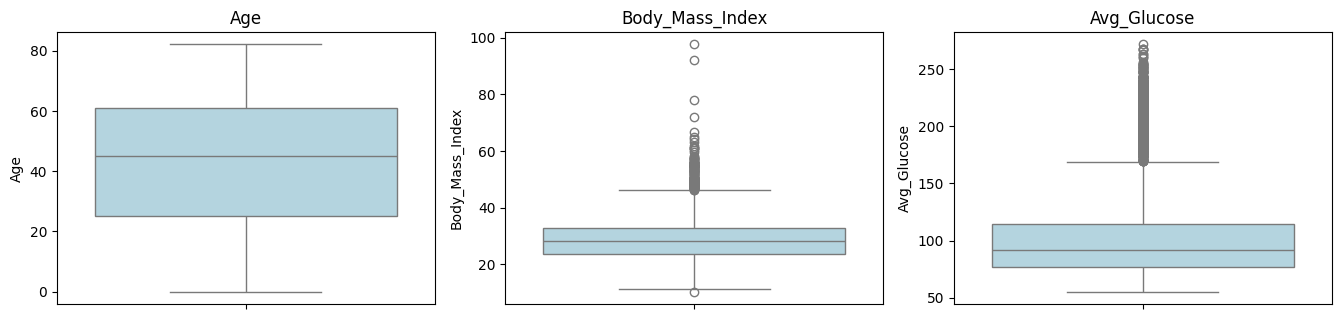

In [232]:
numeric_cols = ['Age', 'Body_Mass_Index', 'Avg_Glucose']

# Plot boxplots
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=mdf[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [239]:
def remove_outliers_iqr(mdf, column):
    Q1 = mdf[column].quantile(0.25)
    Q3 = mdf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    return mdf[(mdf[column] >= lower_bound) & (mdf[column] <= upper_bound)]

# Apply IQR method to the ratio columns
mdf = remove_outliers_iqr(mdf, 'Body_Mass_Index')
mdf = remove_outliers_iqr(mdf, 'Avg_Glucose')

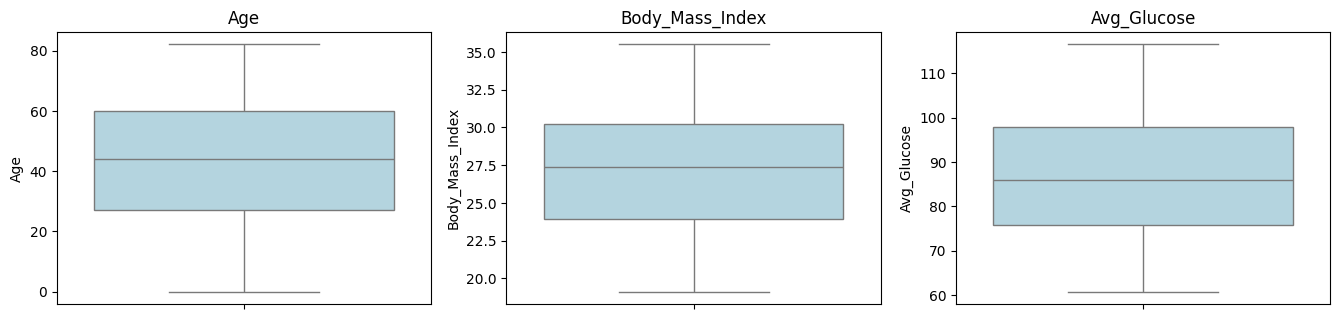

In [240]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=mdf[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

### d. Data Balancing

In [235]:
over_sampling = SMOTE(sampling_strategy = 1)
under_sampling = RandomUnderSampler(sampling_strategy = 0.1)
features = mdf.loc[:,: 'Avg_Glucose']
target= mdf.loc[:,'Stroke_Chance']

steps = [('under', under_sampling),('over', over_sampling)]
pipeline = Pipeline(steps=steps)
features, target = pipeline.fit_resample(features, target)


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = RANDOM_STATE)
Counter(target)

Counter({0: 1550, 1: 1550})

### e. Handling Data Leakage

Text(0.5, 1.0, 'Selection of Numerical Features')

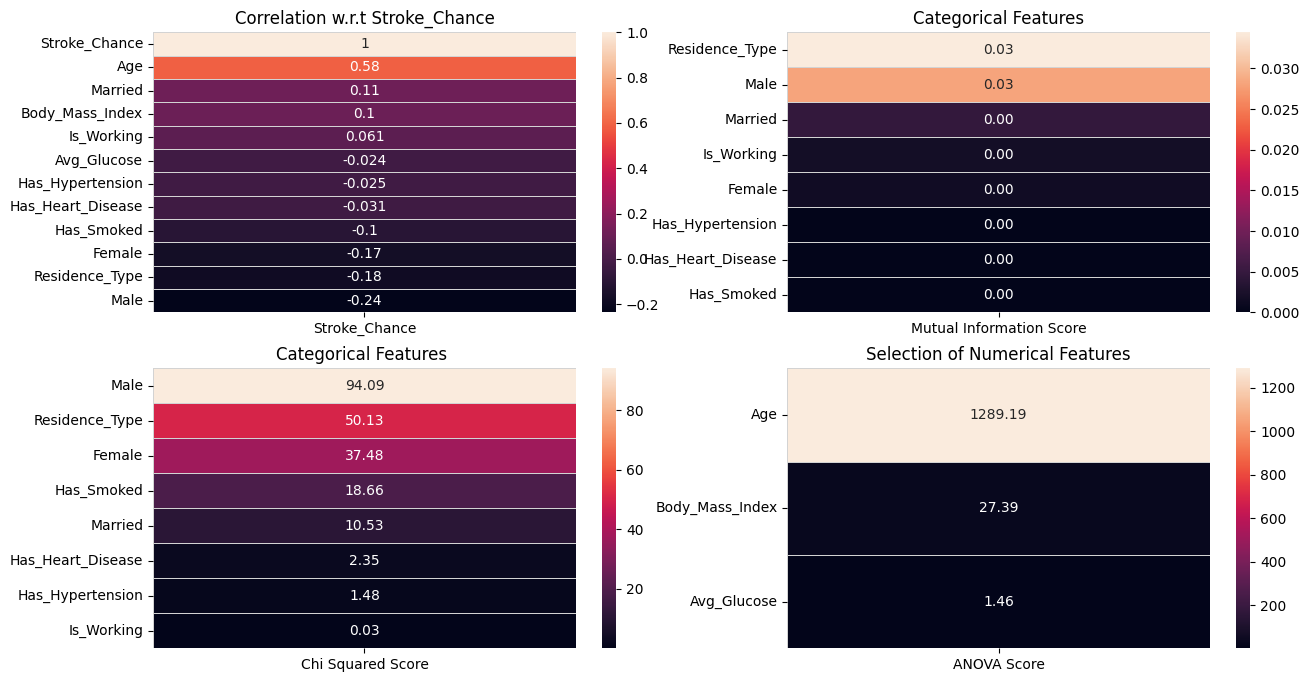

In [236]:
# Limiting the data to only train data to avoid data leakage
x_train_test = x_train.copy(deep = True)
x_train_test['Stroke_Chance'] = y_train

# Visualizations for Non-Leaked Data


# Visualizing the correlation matrix
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))

plt.subplot(2,2,1)
corr = x_train_test.corrwith(x_train_test['Stroke_Chance']).sort_values(ascending = False).to_frame()
corr.columns = ['Stroke_Chance']
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'lightgrey')
plt.title('Correlation w.r.t Stroke_Chance')

# Visualizing the mutual information score for the categorical features for Non-Leaked Data
plt.subplot(2,2,2)
tf = x_train.loc[:,categorical_features]
tt = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(tf,tt)

featureScores = pd.DataFrame(data = fit.scores_,index = list(tf.columns),columns = ['Mutual Information Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,linewidths = 0.4,linecolor = 'lightgrey',fmt = '.2f');
plt.title('Categorical Features')

# Visualizing the CHI-square Score for the categorical features for Non-Leaked Data
plt.subplot(2,2,3)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(tf,tt)

featureScores = pd.DataFrame(data = fit.scores_,index = list(tf.columns),columns = ['Chi Squared Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'lightgrey',fmt = '.2f');
plt.title('Categorical Features ')

# Visualizing the CHI-square Score for the categorical features
plt.subplot(2,2,4)
tf = x_train.loc[:,discrete_features]
tt = y_train

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(tf,tt)

featureScores = pd.DataFrame(data = fit.scores_,index = list(tf.columns),columns = ['ANOVA Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'lightgrey',fmt = '.2f');
plt.title('Selection of Numerical Features')





### f. Best Feature Selection

In [237]:
x_train = x_train.drop(columns = ['Has_Heart_Disease', 'Has_Hypertension','Avg_Glucose'])
x_test = x_test.drop(columns = ['Has_Heart_Disease', 'Has_Hypertension','Avg_Glucose'])

### g. Data Scaling

In [238]:
minmax_scaler = MinMaxScaler()
standard_scaler= StandardScaler()

discrete_features=[col for col in discrete_features if col not in ['Avg_Glucose']]
categorical_features=[col for col in categorical_features if col not in ['Has_Heart_Disease', 'Has_Hypertension']]


for col in discrete_features:
    if col in x_train.columns and col in x_test.columns:
        x_train[[col]]=minmax_scaler.fit_transform(x_train[[col]])
        x_test[[col]]=minmax_scaler.transform(x_test[[col]])
   
    
for col in categorical_features:
     if col in x_train.columns and col in x_test.columns:
                x_train[[col]]=standard_scaler.fit_transform(x_train[[col]])
                x_test[[col]]=standard_scaler.transform(x_test[[col]])


## 6. Model Training ------> PERFORMED BY JAGDISH

## 7. Model Evaluation --------> PERFORMED BY SAIF